In [40]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

In [41]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

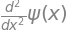

In [42]:
psi(x).diff(x, x)

In [43]:
-k**2 * psi(x)

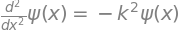

In [44]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [45]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [46]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [ ]:
# sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
# sol

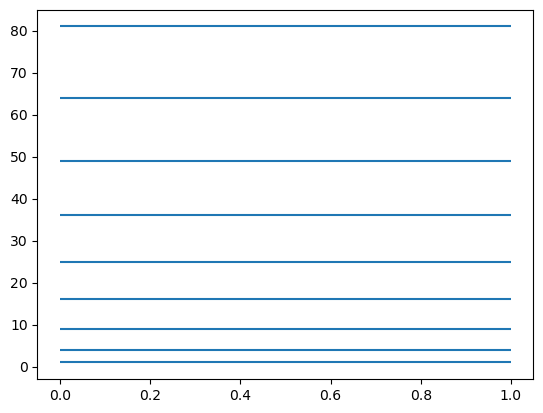

In [47]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

In [48]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [49]:
sol.lhs, sol.rhs

In [50]:
sol.rhs**2

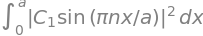

In [51]:
sp.integrate(sp.Abs(sol.rhs)**2, (x, 0, a))

In [52]:
sol.rhs * sp.conjugate(sol.rhs)

In [53]:
sp.integrate(sol.rhs * sp.conjugate(sol.rhs), (x, 0, a))

In [54]:
sp.integrate(sol.rhs**2, (x, 0, a))

In [55]:
sp.Symbol('C1')

In [56]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [ ]:
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E

In [ ]:
fi = sp.exp(-sp.I * E * t / h)
fi

In [ ]:
Psi = sol.rhs * fi
Psi

In [ ]:
Psi.subs({m: 1, a: 1, h: 1})

In [ ]:
Psif = lambdify((x, t, n), Psi.subs({m: 1, a: 1, h: 1}))

In [ ]:
Psif(0.3, 0.1, 1)

In [ ]:
xs = np.linspace(0, 1, 1000)

Psif(xs, 0.1, 1).real

In [ ]:

xs = np.linspace(0, 1, 1000)

plt.grid(linestyle = '--')

ys = Psif(xs, 0, 1).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 2).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 3).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 4).real
plt.plot(xs, ys)

In [ ]:
n = 3

xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.grid(linestyle = '--')

plot1, = plt.plot([], [])
plot2, = plt.plot([], [])

plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

plt.close()

dt = 0.001

def frame(i):
    t = dt * i
    ys = Psif(xs, t, n)
    
    plot1.set_data(xs, ys.real)
    plot2.set_data(xs, ys.imag)

    return plot1, plot2

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())
    

In [ ]:
n = 3

xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.grid(linestyle = '--')

plot1, = plt.plot([], [])

plt.xlim(0, 1)
plt.ylim(0, 2.5)

plt.close()

dt = 0.001

def frame(i):
    t = dt * i
    ys = Psif(xs, t, n)
    
    plot1.set_data(xs, np.abs(ys)**2)

    return plot1, 

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())

In [ ]:
xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.grid(linestyle = '--')

plot1, = plt.plot([], [])

plt.xlim(0, 1)
plt.ylim(0, 6)

plt.close()

dt = 0.001

def frame(i):
    t = dt * i
    ys = (Psif(xs, t, 1) + Psif(xs, t, 2) + Psif(xs, t, 3) + Psif(xs, t, 4)) / np.sqrt(4)
    
    plot1.set_data(xs, np.abs(ys)**2)

    return plot1, 

anim = FuncAnimation(fig, frame, 500, interval = 20, blit = True)
HTML(anim.to_jshtml())

In [ ]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a))

In [ ]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

$$<p>=?$$
$$<p^2>=?$$

Czy zasada nieznaczoności faktycznie jest spełniona?

$$<p>=\int_{0}^{a}\psi(x)  \frac{\partial \psi(x)}{\partial x}$$

In [57]:
p = sp.integrate(sol.rhs * sol.rhs.diff(x), (x, 0, a)).simplify()
p

$$<p^2>= \hbar^2 \int_{0}^{a}\psi(x)  \frac{\partial \psi(x)}{\partial x^2} $$

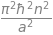

In [58]:
p2 = (-h**2 * sp.integrate(sol.rhs * sol.rhs.diff(x, 2), (x, 0, a))).simplify()

p2

Czy zasada nieznaczoności faktycznie jest spełniona?

Jest spełniona, poniewaz średnia wartość kwadratu pędu jest nieoznaczona. Nie da się określić jednoznacznie jej wartości. Można określić jedynie przedziały wartości jakie przyjmuje.